In [1]:
"""
Is the mushroom poisonous? I don't know and I am too lazy to figure it out, so I made the computer do it.

Source of data: https://www.kaggle.com/datasets/uciml/mushroom-classification/data
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import RidgeCV

data = pd.read_csv(r"mushrooms.csv")
data_columns = list(data.columns)
data = pd.get_dummies(data, columns=data_columns)
data = data.iloc[:,:].values
data_train,data_test = tts(data,test_size=0.8,random_state=0)

"""Creating the training and test sets to compare their accuracies"""
xtr = np.array(data_train[:,1:])
xtt = np.array(data_test[:,1:])
ytr = np.array(data_train[:,:1])
ytt = np.array(data_test[:,:1])

In [2]:
reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(xtr, ytr)
print(reg.score(xtt,ytt))
print(reg.score(xtr,ytr))

0.9999999986637953
0.9999999985210859


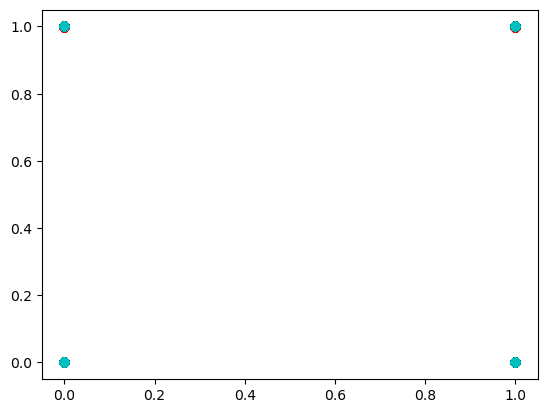

In [5]:
import matplotlib.pyplot as plt

plt.plot(xtr,reg.predict(xtr),'ro')
plt.plot(xtr,ytr,'co')

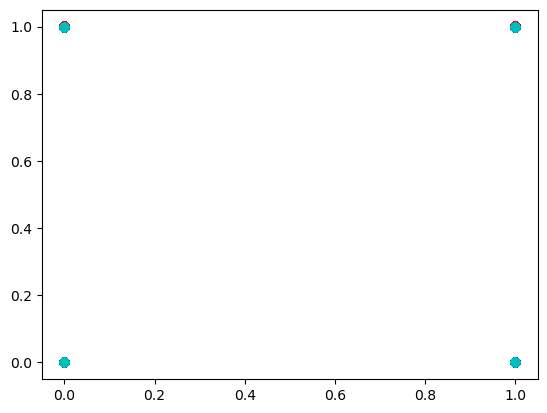

In [9]:
plt.plot(xtt,reg.predict(xtt),'ro')
plt.plot(xtt,ytt,'co')